In [1]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [3]:
collegesuccess_data = pd.read_csv('/content/drive/MyDrive/STAT520/OfficialDataset_Final.csv')

In [4]:
display(collegesuccess_data['Success_Latent'].head())

,Success_Latent
0,-0.301184
1,0.140503
2,-0.458758
3,-0.297089
4,-0.140488


In [5]:
predictors = [
    "SLFCHG01", "SLFCHG03", "SLFCHG04",
    "CSSRAT01", "CSSRAT07",
    "SATIS13", "SATIS01", "SATIS02", "SATIS07", "SATIS15", "SATIS25",
    "CSSRAT16", "GENACT05", "COLACT19", "COLACT17",
    "FATHEDUC", "MOTHEDUC", "RACEGROUP", "UndrRepStud_RC",
    "FINCON_RC", "FirstGen_RC", "INCOME", "HSGPA", "CITIZEN",
    "PLANLIVE", "DSstud_RC", "SIFRAT01", "SIFRAT07", "SIFMAJA",
    "CSSHPW01", "CSSHPW02", "CSSHPW03", "CSSHPW05", "CSSHPW08",
    "COLLGPA", "SUCCESS7"
]

In [6]:
print(collegesuccess_data.columns.tolist())

['SLFCHG01', 'SLFCHG02', 'SLFCHG03', 'SLFCHG04', 'SLFCHG09', 'CSSRAT01', 'CSSRAT07', 'SUCCESS4', 'SUCCESS7', 'SATIS13', 'SATIS01', 'SATIS02', 'SATIS07', 'SATIS15', 'SATIS25', 'SATIS28', 'CSSRAT16', 'GENACT05', 'COLACT19', 'COLACT17', 'FATHEDUC', 'MOTHEDUC', 'RACEGROUP', 'UndrRepStud_RC', 'FINCON_RC', 'FirstGen_RC', 'INCOME', 'HSGPA', 'CITIZEN', 'PLANLIVE', 'DSstud_RC', 'SIFRAT01', 'SIFRAT07', 'SIFMAJA', 'CSSHPW01', 'CSSHPW02', 'CSSHPW03', 'CSSHPW05', 'CSSHPW08', 'COLLGPA', 'Success_Latent']


In [7]:
num_variables = collegesuccess_data.shape[1]
print(f"There are {num_variables} variables in the dataset.")

There are 41 variables in the dataset.


count    4962.000000
mean       -0.005302
std         0.373673
min        -1.852317
25%        -0.297089
50%        -0.013202
75%         0.310772
max         0.637667
Name: Success_Latent, dtype: float64
Mean: -0.00530244594714829
Std: 0.3736734813675903
Unique values count: 143
Sample values: [ 0.33484752  0.63766674 -0.04118076  0.63766674  0.24105413  0.31077217
 -0.14048814  0.12011837 -0.14048814  0.24105413]


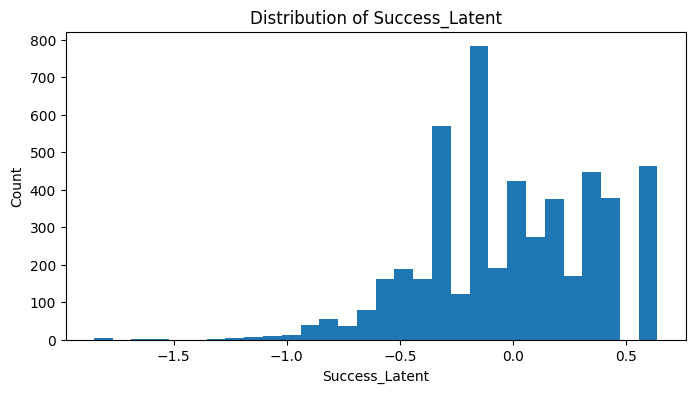

In [8]:
# Basic numeric summary
print(collegesuccess_data['Success_Latent'].describe())

# Check mean and sd (factor scores are usually standardized)
print('Mean:', collegesuccess_data['Success_Latent'].mean())
print('Std:', collegesuccess_data['Success_Latent'].std())

# Check number of unique values and sample
print('Unique values count:', collegesuccess_data['Success_Latent'].nunique())
print('Sample values:', collegesuccess_data['Success_Latent'].sample(10).values)

# Histogram (matplotlib only)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(collegesuccess_data['Success_Latent'].dropna(), bins=30)
plt.title('Distribution of Success_Latent')
plt.xlabel('Success_Latent')
plt.ylabel('Count')
plt.show()

# OLS Regression

In [9]:
X = collegesuccess_data[predictors]
X = sm.add_constant(X)
y = collegesuccess_data["Success_Latent"]

model_full = sm.OLS(y, X).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:         Success_Latent   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     198.8
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:05:18   Log-Likelihood:                 70.335
No. Observations:                4962   AIC:                            -66.67
Df Residuals:                    4925   BIC:                             174.2
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.8908      0.081    -35.

In [10]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.10):
    import statsmodels.api as sm
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed=True
        if not changed:
            break
    return included

selected_vars = stepwise_selection(X.drop(columns="const"), y)
print("Selected predictors:", selected_vars)


Selected predictors: ['SLFCHG04', 'SATIS13', 'SLFCHG01', 'SATIS07', 'SUCCESS7', 'CSSRAT07', 'SLFCHG03', 'SATIS25', 'CSSRAT16', 'CSSHPW08', 'SATIS01', 'COLLGPA', 'SATIS02', 'SATIS15', 'CSSHPW05', 'CSSRAT01', 'GENACT05']


In [11]:
selected_vars = ['SLFCHG01', 'SLFCHG04', 'SATIS13', 'SATIS07', 'SUCCESS7', 'CSSRAT07', 'SLFCHG03', 'SATIS25', 'CSSRAT16', 'CSSHPW08', 'SATIS01', 'COLLGPA', 'SATIS02', 'SATIS15', 'CSSHPW05', 'CSSRAT01', 'GENACT05']

X_sel = sm.add_constant(collegesuccess_data[selected_vars])
y = collegesuccess_data["Success_Latent"]

model_sel = sm.OLS(y, X_sel).fit()
print(model_sel.summary())

                            OLS Regression Results                            
Dep. Variable:         Success_Latent   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     419.7
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:05:24   Log-Likelihood:                 60.563
No. Observations:                4962   AIC:                            -85.13
Df Residuals:                    4944   BIC:                             32.05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9848      0.044    -68.566      0.0

# OLS Assumptions

<Figure size 800x600 with 0 Axes>

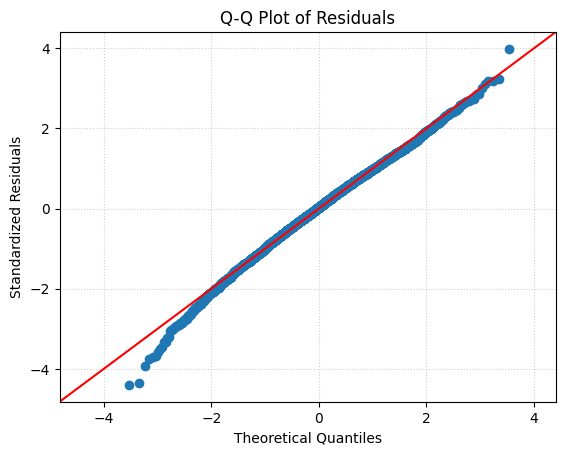

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Get residuals from the selected model
residuals = model_sel.resid

# Create Q-Q plot
fig = plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

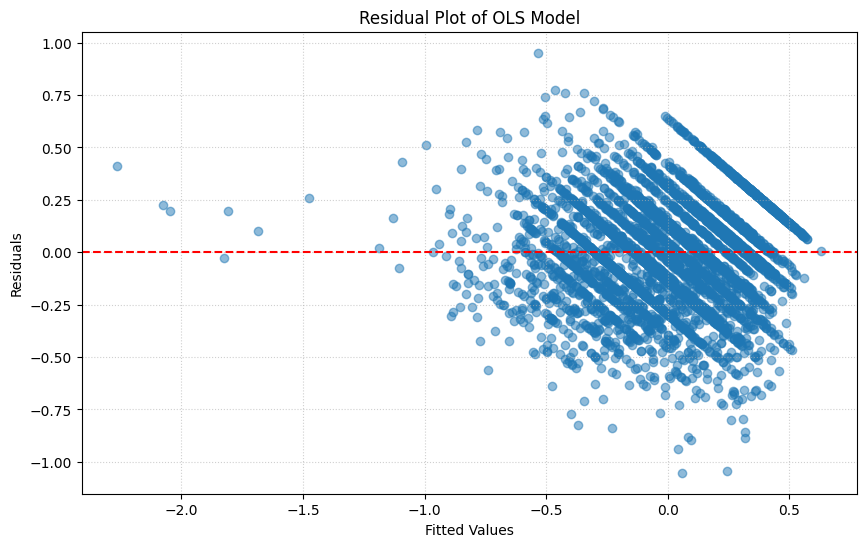

In [13]:
import matplotlib.pyplot as plt

# Get predicted values from the selected model
predicted_values = model_sel.fittedvalues

# Get residuals from the selected model
residuals = model_sel.resid

# Create residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot of OLS Model')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Correlations

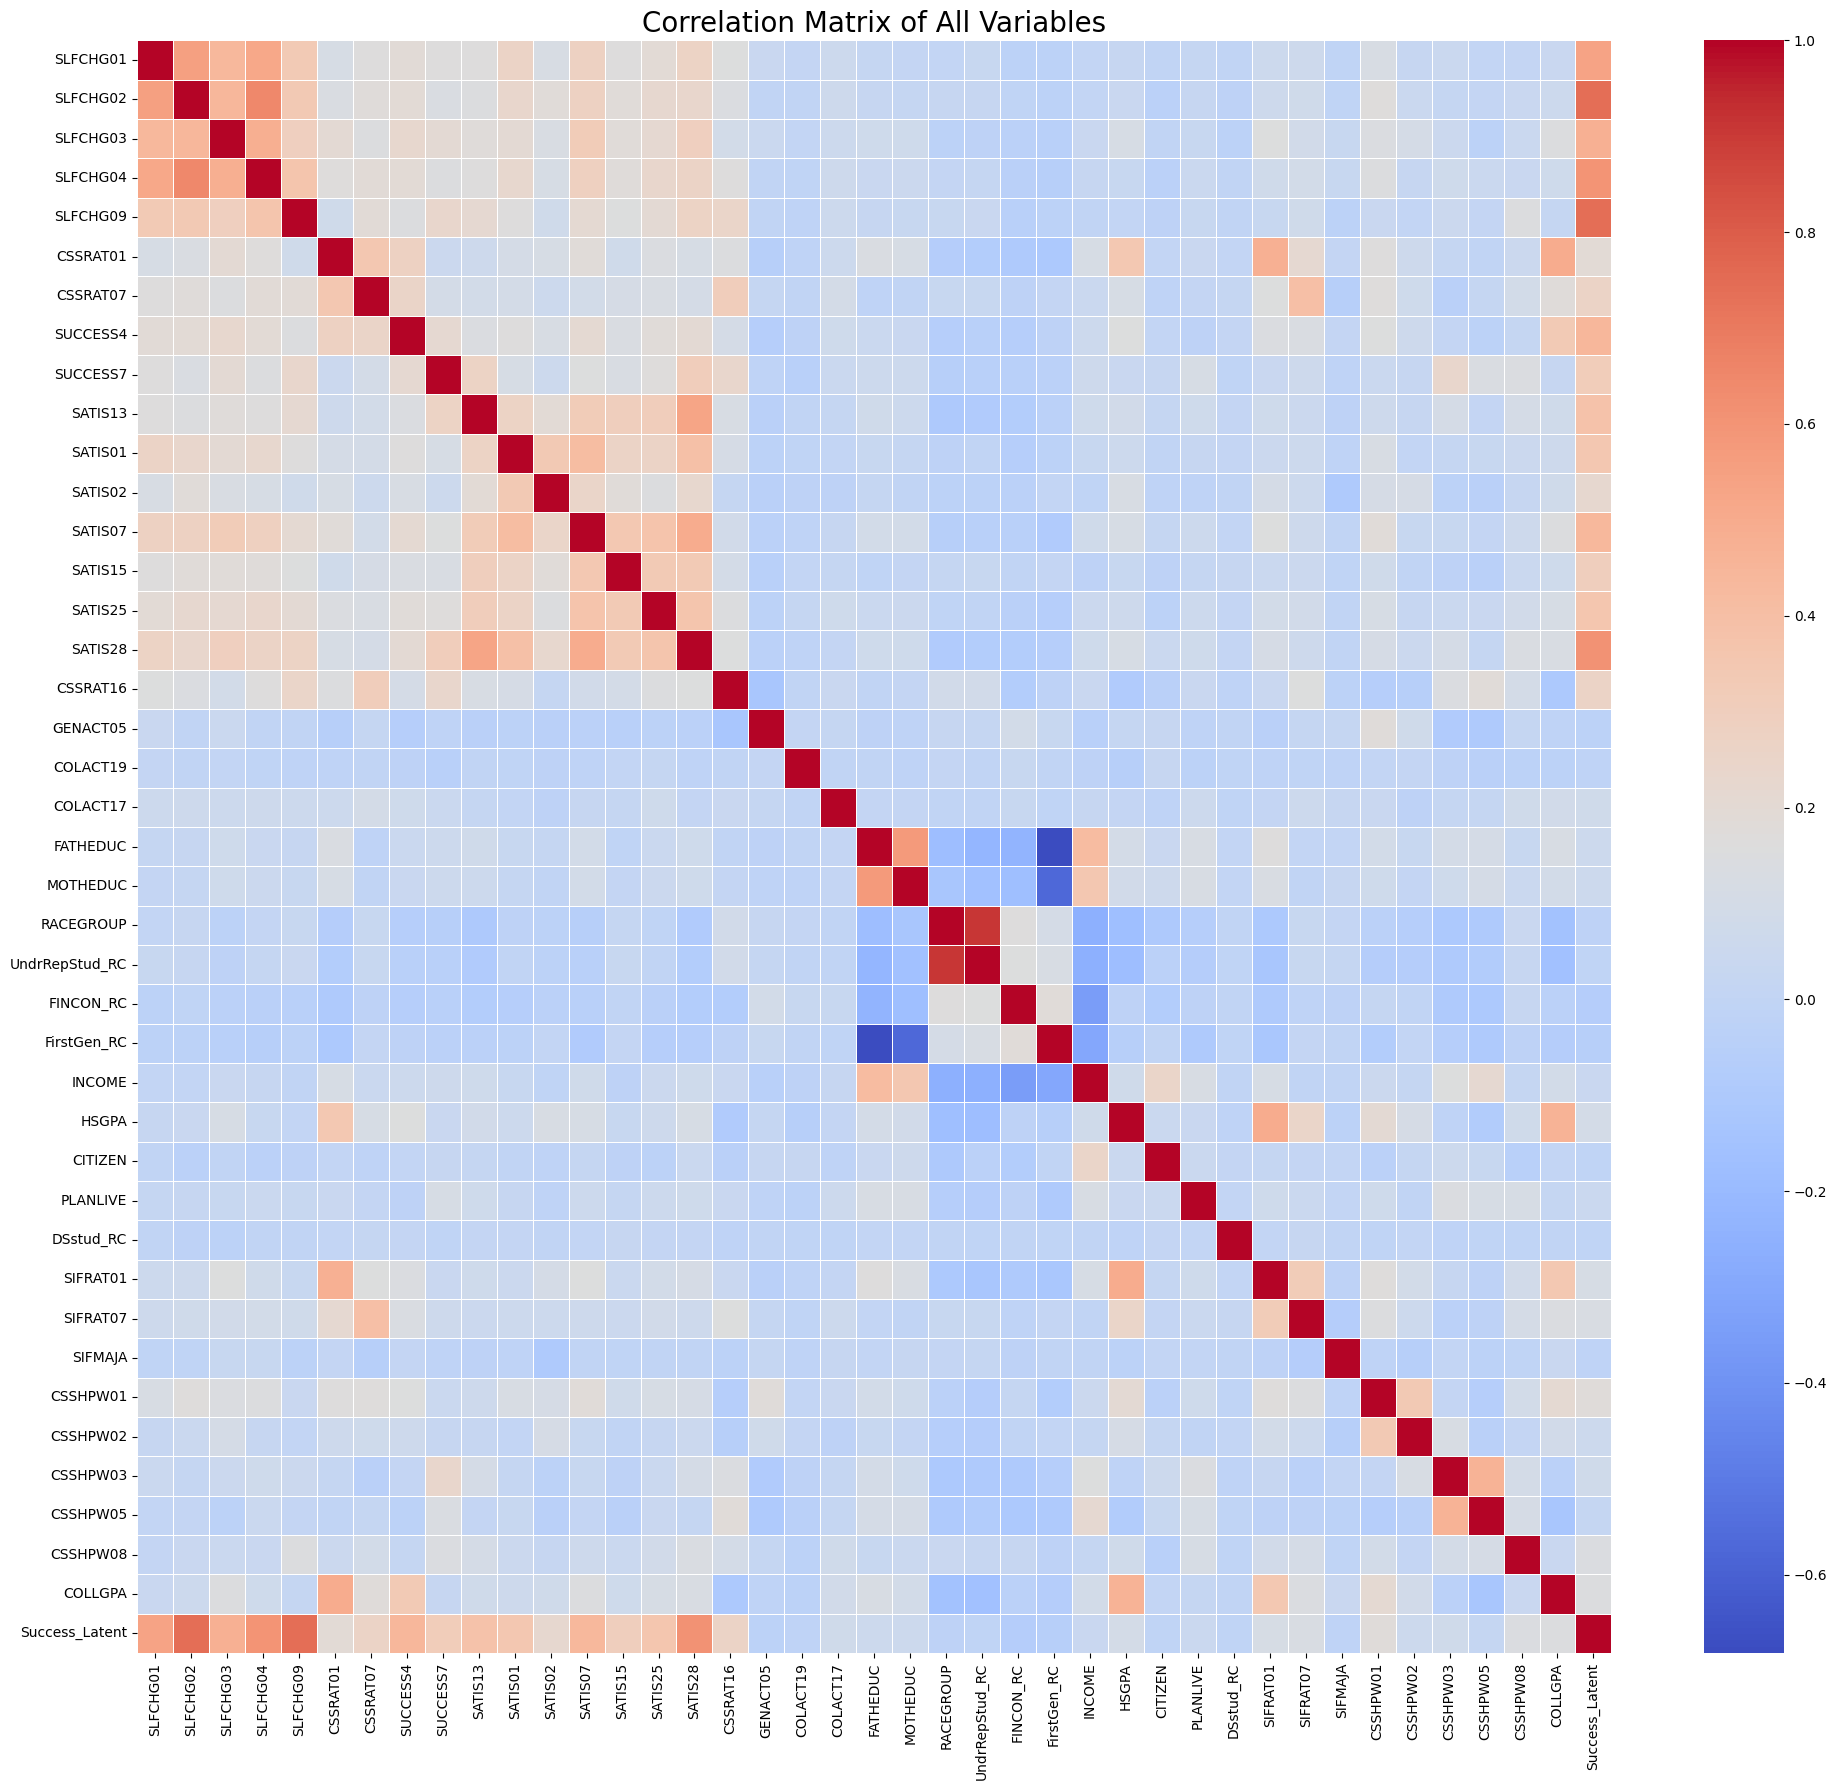

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = collegesuccess_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18)) # Adjust size as needed for readability

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Variables', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
# Unstack the correlation matrix to get pairs of variables and their correlations
correlation_pairs = correlation_matrix.unstack()

# Sort the correlation pairs in descending order of absolute correlation value
sorted_pairs = correlation_pairs.sort_values(key=abs, ascending=False)

# Filter out self-correlations (correlation of a variable with itself is always 1)
# and duplicate pairs (e.g., A-B and B-A)
filtered_pairs = sorted_pairs[sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1)]

# Get only unique pairs (A-B but not B-A). Divide by 2 because each pair appears twice (A-B and B-A)
unique_pairs = filtered_pairs.iloc[::2]

print("Top 10 Correlations (absolute value):")
print(unique_pairs.head(10))

Top 10 Correlations (absolute value):
UndrRepStud_RC  RACEGROUP         0.909219
SLFCHG02        Success_Latent    0.743703
SLFCHG09        Success_Latent    0.741960
FirstGen_RC     FATHEDUC         -0.681477
SLFCHG04        SLFCHG02          0.646442
SATIS28         Success_Latent    0.609154
SLFCHG04        Success_Latent    0.600067
FATHEDUC        MOTHEDUC          0.576558
MOTHEDUC        FirstGen_RC      -0.573262
SLFCHG01        SLFCHG02          0.549241
dtype: float64


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Exclude the constant from the VIF calculation
X_vif = X_sel.drop(columns='const')

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("VIF Scores for Selected Predictors:")
print(vif_data.sort_values(by='VIF', ascending=False))

VIF Scores for Selected Predictors:
     feature         VIF
6   SLFCHG03  106.789227
0   SLFCHG01   89.617038
1   SLFCHG04   79.813671
15  CSSRAT01   52.002228
3    SATIS07   48.438163
11   COLLGPA   38.422088
5   CSSRAT07   34.258484
10   SATIS01   33.637518
4   SUCCESS7   33.388182
8   CSSRAT16   24.154937
7    SATIS25   21.152499
2    SATIS13   20.070627
13   SATIS15   18.253024
12   SATIS02   16.702148
16  GENACT05   14.900909
14  CSSHPW05    5.248782
9   CSSHPW08    4.198581


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use the original list of all predictors
X_all_for_vif = collegesuccess_data[predictors]

# Drop rows with NaN values in predictors, as VIF cannot be calculated with NaNs
X_all_for_vif = X_all_for_vif.dropna()

# If X_all_for_vif becomes empty after dropping NaNs, handle this case
# For simplicity, we assume there are enough complete rows for calculation.

# Calculate VIF for each predictor
vif_data_all = pd.DataFrame()
vif_data_all["feature"] = X_all_for_vif.columns
vif_data_all["VIF"] = [variance_inflation_factor(X_all_for_vif.values, i) for i in range(X_all_for_vif.shape[1])]

print("VIF Scores for ALL Original Predictors:")
print(vif_data_all.sort_values(by='VIF', ascending=False))

VIF Scores for ALL Original Predictors:
           feature         VIF
25       DSstud_RC  124.870143
1         SLFCHG03  114.594780
0         SLFCHG01   93.085503
2         SLFCHG04   81.010043
23         CITIZEN   62.381150
3         CSSRAT01   60.344212
26        SIFRAT01   56.842954
13        COLACT19   51.502455
8          SATIS07   49.361901
34         COLLGPA   46.284994
22           HSGPA   40.234391
4         CSSRAT07   40.060258
27        SIFRAT07   37.239498
35        SUCCESS7   35.303066
6          SATIS01   34.002976
30        CSSHPW02   30.270066
11        CSSRAT16   25.301377
24        PLANLIVE   23.215298
31        CSSHPW03   21.461605
10         SATIS25   21.328687
5          SATIS13   20.504089
17       RACEGROUP   20.070578
15        FATHEDUC   19.913524
29        CSSHPW01   19.206034
9          SATIS15   18.461432
7          SATIS02   17.361924
12        GENACT05   17.097806
16        MOTHEDUC   15.882904
21          INCOME   15.214472
14        COLACT17   10.058804

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Exclude latent Success variables from predictors
success_vars = ['SATIS28', 'SUCCESS4','SLFCHG09','SLFCHG02']  # add any other Success indicators if needed
X = collegesuccess_data.drop(columns=['Success_Latent'] + success_vars)
y = collegesuccess_data['Success_Latent']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# StandardScaler - fit only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling done. First few rows of scaled training data:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

Training set shape: (3969, 36)
Test set shape: (993, 36)
Scaling done. First few rows of scaled training data:
   SLFCHG01  SLFCHG03  SLFCHG04  CSSRAT01  CSSRAT07  SUCCESS7   SATIS13  \
0 -0.816835  0.661600  1.035043  0.037426 -0.087500  0.579250  0.255829   
1  0.903068  0.661600  1.035043  0.037426  1.170788  0.579250 -0.762613   
2 -0.816835 -1.190226 -0.571561  0.037426 -0.087500 -1.357602 -0.762613   
3  0.903068  0.661600  1.035043  0.037426  1.170788  0.579250  0.255829   
4  0.903068  0.661600 -0.571561  0.037426 -0.087500  0.579250  0.255829   

    SATIS01   SATIS02   SATIS07  ...  DSstud_RC  SIFRAT01  SIFRAT07   SIFMAJA  \
0 -1.101613  0.448970 -0.114073  ...  -0.071166  0.079660 -0.093934 -1.289037   
1 -2.360917 -0.578097 -0.114073  ...  -0.071166  0.079660  1.178503  1.045184   
2  0.157691  0.448970 -0.114073  ...  -0.071166  0.079660 -0.093934  1.469588   
3  0.157691  0.448970 -0.114073  ...  -0.071166 -1.390893  1.178503  1.681790   
4  0.157691  1.476036 -0.114073  

# LASSO Regression

In [16]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import pandas as pd

# Lasso with 5-fold CV on training set
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Chosen alpha
print("Chosen alpha:", lasso.alpha_)

# Important predictors (non-zero coefficients)
lasso_importance = pd.Series(lasso.coef_, index=X_train.columns)
top_lasso = lasso_importance[lasso_importance != 0].sort_values(key=abs, ascending=False)
print("Top Lasso predictors (excluding Success indicators):\n", top_lasso)

# Test set evaluation
y_pred_test = lasso.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
print("Test set R-squared:", r2_test)

Chosen alpha: 0.0019493458475351238
Top Lasso predictors (excluding Success indicators):
 SLFCHG04       0.117149
SLFCHG01       0.075083
SATIS13        0.053769
SATIS07        0.039286
SUCCESS7       0.037975
SLFCHG03       0.034701
CSSRAT16       0.033809
CSSHPW08       0.024258
COLLGPA        0.020036
CSSRAT07       0.019490
SATIS25        0.018810
SATIS01        0.018269
SATIS02        0.015589
SATIS15        0.012263
CSSHPW05      -0.008077
CSSHPW01       0.006279
CSSRAT01      -0.005892
GENACT05      -0.005542
COLACT17       0.005494
PLANLIVE      -0.003648
COLACT19      -0.003437
FINCON_RC     -0.003028
SIFRAT01      -0.001900
DSstud_RC     -0.001506
SIFRAT07      -0.001027
CSSHPW02       0.000521
FirstGen_RC   -0.000300
CSSHPW03      -0.000068
RACEGROUP      0.000033
dtype: float64
Test set R-squared: 0.5959598060034805


# Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest on training set (no scaling needed)
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
top_rf = rf_importance.sort_values(ascending=False)
print("Top Random Forest predictors (excluding Success indicators):\n", top_rf)

Top Random Forest predictors (excluding Success indicators):
 SLFCHG04          0.336167
SLFCHG01          0.067977
SATIS13           0.063912
SATIS07           0.044972
SIFMAJA           0.029699
SUCCESS7          0.027865
INCOME            0.027300
SLFCHG03          0.025604
CSSRAT16          0.024936
CSSHPW05          0.024243
CSSHPW08          0.023369
SATIS25           0.022220
CSSHPW01          0.021497
SATIS01           0.020378
SATIS15           0.019271
CSSHPW03          0.018433
MOTHEDUC          0.017482
CSSRAT07          0.017354
FATHEDUC          0.017343
SATIS02           0.016973
HSGPA             0.016620
CSSHPW02          0.016072
COLLGPA           0.015330
SIFRAT07          0.012176
RACEGROUP         0.011374
CSSRAT01          0.011266
SIFRAT01          0.009483
FINCON_RC         0.009336
GENACT05          0.008937
COLACT17          0.006607
PLANLIVE          0.005343
FirstGen_RC       0.003486
UndrRepStud_RC    0.002480
COLACT19          0.002321
CITIZEN           0.

# LASSO and Random Forest Metrics

In [18]:
from sklearn.metrics import mean_squared_error

y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Lasso MSE:", mse_lasso)
print("Random Forest MSE:", mse_rf)

Lasso MSE: 0.05585483534180366
Random Forest MSE: 0.05817729423329285


In [19]:
rf_oob = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)
print("Random Forest OOB R²:", rf_oob.oob_score_)

Random Forest OOB R²: 0.5551165183225439


In [20]:
from sklearn.metrics import r2_score

y_pred_rf = rf.predict(X_test)
r2 = r2_score(y_test, y_pred_rf)
print("Random Forest R²:", r2)

Random Forest R²: 0.5791597074028152


# RIDGE Regression

In [23]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
import pandas as pd

# Ridge with 5-fold CV on training set
ridge = RidgeCV(cv=5)
ridge.fit(X_train_scaled, y_train)

# Chosen alpha (from the best model found by RidgeCV)
print("Chosen alpha:", ridge.alpha_)

# Important predictors (coefficients)
ridge_importance = pd.Series(ridge.coef_, index=X_train.columns)
top_ridge = ridge_importance.sort_values(key=abs, ascending=False)
print("Top Ridge predictors (excluding Success indicators):\n", top_ridge.head(20)) # Print top 20 for brevity

# Test set evaluation
y_pred_ridge = ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Test set R-squared:", r2_ridge)

Chosen alpha: 10.0
Top Ridge predictors (excluding Success indicators):
 SLFCHG04     0.117410
SLFCHG01     0.075331
SATIS13      0.054173
SATIS07      0.039629
SUCCESS7     0.039102
CSSRAT16     0.036016
SLFCHG03     0.035649
CSSHPW08     0.025992
COLLGPA      0.023292
CSSRAT07     0.021887
SATIS25      0.019387
SATIS01      0.018690
SATIS02      0.016549
SATIS15      0.012506
CSSRAT01    -0.010915
CSSHPW05    -0.008996
GENACT05    -0.008117
CSSHPW01     0.007817
COLACT17     0.007342
FINCON_RC   -0.006228
dtype: float64
Test set R-squared: 0.5959497243410685


# Elastic Net Regression

In [24]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import pandas as pd

# Elastic Net with 5-fold CV on training set
# l1_ratio specifies the mixing parameter, with 0 corresponding to Ridge and 1 to Lasso.
# Here we let CV choose the best l1_ratio among the provided options.
elastic_net = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# Chosen alpha and l1_ratio
print("Chosen alpha:", elastic_net.alpha_)
print("Chosen l1_ratio:", elastic_net.l1_ratio_)

# Important predictors (non-zero coefficients)
elastic_net_importance = pd.Series(elastic_net.coef_, index=X_train.columns)
top_elastic_net = elastic_net_importance[elastic_net_importance != 0].sort_values(key=abs, ascending=False)
print("Top Elastic Net predictors (excluding Success indicators):\n", top_elastic_net.head(20)) # Print top 20 for brevity

# Test set evaluation
y_pred_elastic_net = elastic_net.predict(X_test_scaled)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print("Test set R-squared:", r2_elastic_net)

Chosen alpha: 0.003898691695070248
Chosen l1_ratio: 0.5
Top Elastic Net predictors (excluding Success indicators):
 SLFCHG04    0.116907
SLFCHG01    0.075028
SATIS13     0.053691
SATIS07     0.039254
SUCCESS7    0.037943
SLFCHG03    0.034782
CSSRAT16    0.033764
CSSHPW08    0.024222
COLLGPA     0.019960
CSSRAT07    0.019488
SATIS25     0.018847
SATIS01     0.018302
SATIS02     0.015579
SATIS15     0.012303
CSSHPW05   -0.008057
CSSHPW01    0.006300
CSSRAT01   -0.005811
GENACT05   -0.005534
COLACT17    0.005497
PLANLIVE   -0.003633
dtype: float64
Test set R-squared: 0.5959595639986699


# ML Comparisons (Variable Significance)

In [25]:
import pandas as pd
import numpy as np

# Get absolute values for Lasso, Ridge, and Elastic Net coefficients
lasso_abs = top_lasso.abs()
ridge_abs = top_ridge.abs()
elastic_net_abs = top_elastic_net.abs()

# top_rf already contains positive importance values

# Combine indices of top predictors from all four models
all_predictors = pd.Index([])
all_predictors = all_predictors.union(lasso_abs.index)
all_predictors = all_predictors.union(ridge_abs.index)
all_predictors = all_predictors.union(top_rf.index)
all_predictors = all_predictors.union(elastic_net_abs.index)

# Reindex all importance series to the combined list of predictors, filling NaN with 0
combined_importance_df_all = pd.DataFrame({
    'Lasso_Importance': lasso_abs.reindex(all_predictors, fill_value=0),
    'Ridge_Importance': ridge_abs.reindex(all_predictors, fill_value=0),
    'RandomForest_Importance': top_rf.reindex(all_predictors, fill_value=0),
    'ElasticNet_Importance': elastic_net_abs.reindex(all_predictors, fill_value=0)
})

# Calculate an aggregate importance score (e.g., mean) and sort by it
combined_importance_df_all['Aggregate_Importance'] = combined_importance_df_all.mean(axis=1)
combined_importance_df_all = combined_importance_df_all.sort_values(by='Aggregate_Importance', ascending=False)

# Select the top 20 predictors
top_20_predictors_df_all = combined_importance_df_all.head(20)

print("DataFrame with combined top 20 importances:")
print(top_20_predictors_df_all)

DataFrame with combined top 20 importances:
          Lasso_Importance  Ridge_Importance  RandomForest_Importance  \
SLFCHG04          0.117149          0.117410                 0.336167   
SLFCHG01          0.075083          0.075331                 0.067977   
SATIS13           0.053769          0.054173                 0.063912   
SATIS07           0.039286          0.039629                 0.044972   
SUCCESS7          0.037975          0.039102                 0.027865   
SLFCHG03          0.034701          0.035649                 0.025604   
CSSRAT16          0.033809          0.036016                 0.024936   
CSSHPW08          0.024258          0.025992                 0.023369   
SATIS25           0.018810          0.019387                 0.022220   
COLLGPA           0.020036          0.023292                 0.015330   
CSSRAT07          0.019490          0.021887                 0.017354   
SATIS01           0.018269          0.018690                 0.020378   
SATIS02

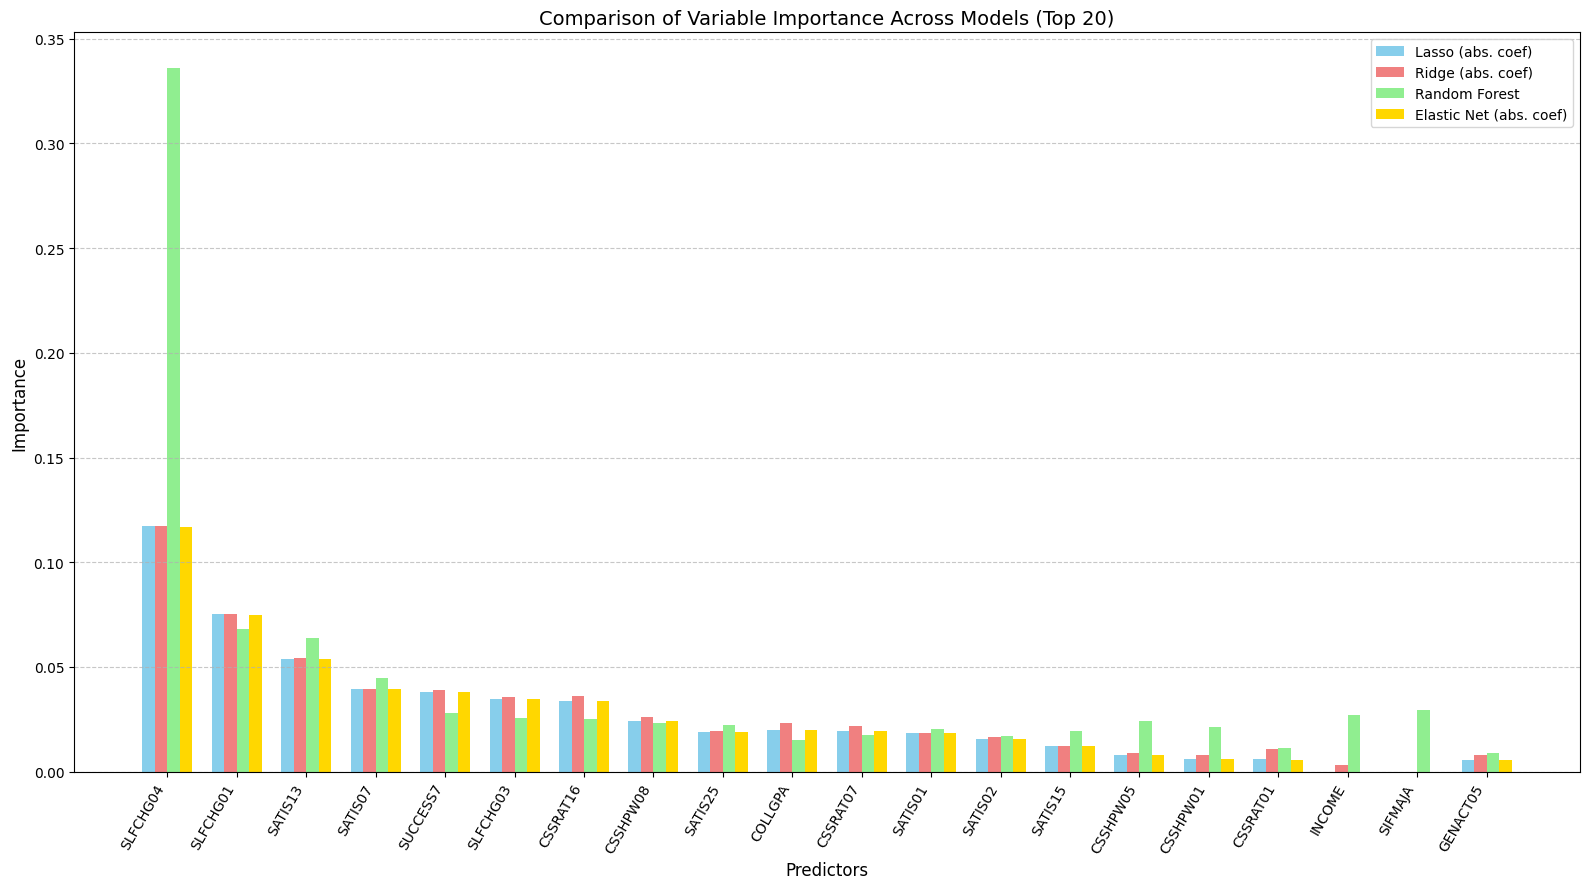

Grouped bar chart showing variable importances generated.


In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Set up a figure and axes for the plot
fig, ax = plt.subplots(figsize=(16, 9)) # Increased figure size for better readability

# Define the width for each bar and calculate x-axis positions
bar_width = 0.18 # Adjusted bar width for four bars
index = np.arange(len(top_20_predictors_df_all))

# Create four sets of bars for each model's importance
bar1 = ax.bar(index - 1.5 * bar_width, top_20_predictors_df_all['Lasso_Importance'], bar_width, label='Lasso (abs. coef)', color='skyblue')
bar2 = ax.bar(index - 0.5 * bar_width, top_20_predictors_df_all['Ridge_Importance'], bar_width, label='Ridge (abs. coef)', color='lightcoral')
bar3 = ax.bar(index + 0.5 * bar_width, top_20_predictors_df_all['RandomForest_Importance'], bar_width, label='Random Forest', color='lightgreen')
bar4 = ax.bar(index + 1.5 * bar_width, top_20_predictors_df_all['ElasticNet_Importance'], bar_width, label='Elastic Net (abs. coef)', color='gold')

# Set the x-axis labels to the predictor names and rotate them
ax.set_xlabel('Predictors', fontsize=12)
ax.set_ylabel('Importance', fontsize=12)
ax.set_title('Comparison of Variable Importance Across Models (Top 20)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(top_20_predictors_df_all.index, rotation=60, ha='right', fontsize=10)

# Add a legend to distinguish between the models
ax.legend()

# Add a grid to the y-axis for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure all elements fit within the figure, and display the plot
plt.tight_layout()
plt.show()

print("Grouped bar chart showing variable importances generated.")